# Load Data and Clean Data

## Introduction

Data analysis has become an increasingly important tool in the world of football, as teams and analysts strive to gain a competitive edge by uncovering insights from the vast amounts of data that are generated during games and throughout the season. One important aspect of data analysis in football is the analysis of goals, which is a fundamental measure of a team's performance and an essential statistic for understanding how and why teams win or lose.

Another area of focus in football data analysis is the classification of players and teams. This can include identifying key attributes and characteristics that distinguish successful teams and players from those that struggle, such as ball possession, passing accuracy, and defensive positioning. Additionally, analysts can use machine learning techniques to classify players into different positions or roles, such as midfielders, forwards and defenders, and these classifications can be useful in scouting, trade and recruitment of players.

Another area of interest is in the analysis of assists, which is an indicator of a player's ability to create scoring opportunities for their teammates. With the ability to track the movement of the ball and players on the field, analysts can now gain a deeper understanding of how assists are created and which players are most effective at setting up goals. These insights can be used to inform tactics, identify areas of improvement and discover hidden patterns in how teams are playing.

Overall, data analysis in football is a powerful tool that can help teams and analysts to gain a better understanding of the game, improve performance and make more informed decisions. With the abundance of data that is available and the increasing availability of advanced analytical techniques, the opportunities for data analysis in football are almost limitless.

In this case, the Kings League, although it is based on the rules of _Fútbol 7_, has other external elements that can make the results even more variable. Still, I am curious to analyze such data and create a predictive model.

Using the BeautifulSoup library we are going to load different data from the [kingsleague.pro](https://kingsleague.pro/) website. Among other data we read the classification data of the 12 teams, schedule of matches between teams and assists per player and team.

In [44]:
import pandas as pd

import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import seaborn as sns

This function is called "cleandata" and it takes in two arguments:

_x_: a string variable that represents the data that needs to be cleaned.  
_S_: a list of strings that are used to replace the characters in _x_.
The purpose of this function is to clean up a string of data by removing or replacing certain characters or sub-strings.

Here's how the function works:

  * The function starts a for loop that iterates through the items in the list _S_.
  * For each item s in the list _S_, the function replaces all occurrences of s in x with an empty string using the _.replace()_ method.
  * The .replace() method replaces all occurrences of a substring with another substring. If the second argument is empty string that means it remove the first argument substring
  * This process is repeated for each item in the list _S_.
  * Finally, the function returns the cleaned version of _x_ as the output.

It's important to note that this function will only remove the exact characters and sub-strings specified in the list S, and it does not do any other kind of data cleaning or validation. This function can be useful for specific data-scraping use case or to clean up the data before further processing.

In [45]:
def cleandata(x, S = ["\t", "\n", "V:", "D:", "GF:", "GC:", "TA:", "TR:", "Pos.:", "Equip."]):
    """
    Cleans a string by removing specified substrings.
    
    Parameters:
    x (str): The string to be cleaned.
    S (list[str]): A list of substrings to be removed from the string. Default is a list of common substrings in football data such as "\t", "\n", "V:", "D:", "GF:", "GC:", "TA:", "TR:", "Pos.:", "Equip."
    
    Returns:
    str : the cleaned string
    
    Example:
    >> x = "\tTeam A\nV: 12\nD: 3\nGF: 45\nGC: 20\nTA: 65\nTR: +25\nPos.: 1\nEquip.:\t Manchester United"
    >> cleandata(x)
    "Team A 12 3 45 20 65 +25 1 Manchester United"
    
    """    
    for s in S:
        x = x.replace(s,"")
    return x

## Classification

In football, a league is a competition in which teams play against each other on a regular basis. The teams are usually divided into different divisions or groups, and the teams in each division compete against each other. A classification is the ranking of teams within a league or division based on their performance. This is typically determined by the number of wins, losses, and draws a team has, and sometimes by other factors such as goal difference. The team with the most points at the end of the season is typically considered the champion of the league or division.

In the **Kings League** there is no possibility of a draw, one team wins and the other loses.

In [46]:
url = 'https://kingsleague.pro/estadisticas/clasificacion/'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:108.0) Gecko/20100101 Firefox/108.0',
          'referer': url}

r = requests.get(url, 
                 headers = headers,)
soup = BeautifulSoup(r.text)

data = []

for table in soup.find_all('table'):
    table_body = table.find('tbody')
    rows = table_body.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [cleandata(ele.text.strip()) for ele in cols]
        data.append([ele for ele in cols if ele]) 

In [47]:
classification = \
pd.DataFrame(data, columns = ['Posición', 'Team', 'Equipo', 'V', 'D', 'GF', 'GC', 'TA', 'TR'])
classification.drop(columns = ['Team'], inplace = True)
classification = classification.set_index('Equipo')
classification

,Posición,V,D,GF,GC,TA,TR
Equipo,,,,,,,
Ultimate Móstoles,1,2,0,8,3,1,0
1K FC,2,2,0,7,4,0,0
Saiyans FC,3,2,0,5,3,3,0
Kunisports,4,2,0,3,1,1,0
El Barrio,5,1,1,7,3,1,0
Los Troncos FC,6,1,1,8,8,1,0
Porcinos FC,7,1,1,7,7,1,0
Rayo de Barcelona,8,1,1,7,7,0,0
Jijantes FC,9,0,2,4,7,2,0


## Schedule

In a football league, a schedule refers to the list of games that teams will play during the course of a season. The schedule typically includes the date, time, and location of each game, as well as the teams that will be playing. The schedule is often released before the start of the season and is used to plan and organize the games.

In [48]:
url = 'https://kingsleague.pro/calendario/'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:108.0) Gecko/20100101 Firefox/108.0',
          'referer': url}

r = requests.get(url, headers = headers,)
soup = BeautifulSoup(r.text)

In [49]:
data = []
for table in soup.find_all('table'):
    table_body = table.find('tbody')
    rows = table_body.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [cleandata(ele.text.strip()) for ele in cols]
        data.append([ele for ele in cols if ele]) # G

In [50]:
pd.DataFrame(data, 
             columns = ["Equipo (Local)", "Siglas (Local)", "Hora", "Siglas (Visitante)", "Equipo (Visitante)", "Resultado"])\
    .style

,Equipo (Local),Siglas (Local),Hora,Siglas (Visitante),Equipo (Visitante),Resultado
0,Rayo de Barcelona,RDB,16:00,1K,1K FC,2 – 4
1,Kunisports,KNS,17:00,JFC,Jijantes FC,2 – 1
2,El Barrio,ELB,18:00,PIO,PIO FC,5 – 0
3,Los Troncos FC,TFC,19:00,XBU,XBUYER TEAM,5 – 3
4,Aniquiladores FC,ANI,20:00,ULT,Ultimate Móstoles,1 – 5
5,Saiyans FC,SAI,21:00,POR,Porcinos FC,4 – 2
6,Jijantes FC,JFC,16:00,RDB,Rayo de Barcelona,3 – 5
7,Ultimate Móstoles,ULT,17:00,ELB,El Barrio,3 – 2
8,1K FC,1K,18:00,ANI,Aniquiladores FC,3 – 2
9,Porcinos FC,POR,19:00,TFC,Los Troncos FC,5 – 3


In [51]:
data = []
for table in soup.find_all('table'):
    table_body = table.find('tbody')
    rows = table_body.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [cleandata(ele.text.strip()) for ele in cols]
        data.append([ele for ele in cols if ele]) # G
        
data = pd.DataFrame(data)
data = data.loc[data[2] != "vs", :]
data['GL'] = [cleandata(x[0], ["(" + str(x) + ")" for x in range(10)]) for x in data[5].str.split("–")]
data['GV'] = [cleandata(x[1], ["(" + str(x) + ")" for x in range(10)]) for x in data[5].str.split("–")]
data

data = \
pd.concat([
    pd.DataFrame({'Equipo': data[0], 'Siglas': data[1], 'Goles': data['GL']}),
    pd.DataFrame({'Equipo': data[4], 'Siglas': data[3], 'Goles': data['GV']})]).sort_values(by = 'Equipo')
data.Goles = pd.to_numeric(data.Goles)

This table shows the average number of goals (using the median as the central estimate) for each team in the Kings League. We will use this central estimate to derive the Poisson distribution of expected goals per game.

The table is ordered from lowest to highest number of expected goals.

In [55]:
data.groupby(['Equipo', 'Siglas', ]).median().sort_values(by = 'Goles')

,,Goles
Equipo,Siglas,
PIO FC,PIO,0.5
Aniquiladores FC,ANI,1.5
Kunisports,KNS,1.5
XBUYER TEAM,XBU,1.5
Jijantes FC,JFC,2.0
Saiyans FC,SAI,2.5
1K FC,1K,3.5
El Barrio,ELB,3.5
Porcinos FC,POR,3.5


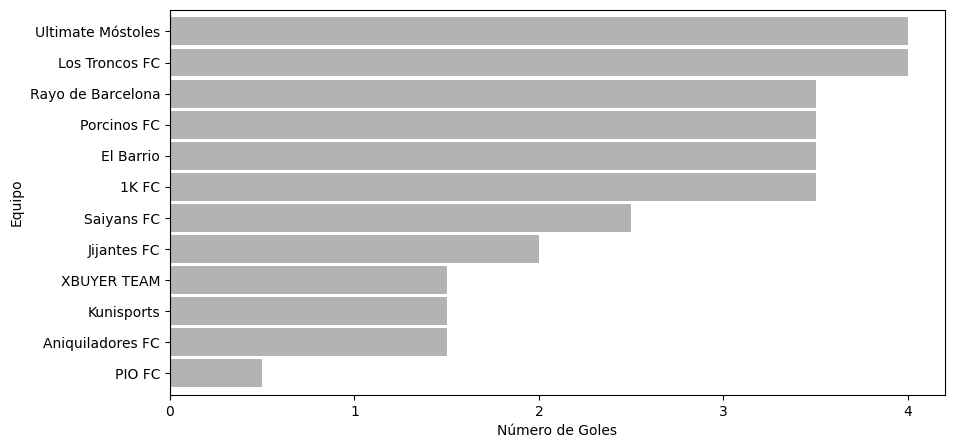

In [56]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5))
data.groupby('Equipo').median().sort_values(by = 'Goles').plot.barh(ax = ax, width = 0.9, color = '0.7', legend = None)
ax.set_xticks([0,1,2,3,4])
ax.set_xlabel('Número de Goles')
plt.show()

In [57]:
data.groupby(['Equipo', 'Siglas']).median().sort_values(by = 'Goles').merge(classification, left_index = True, right_index = True)

,,Goles,Posición,V,D,GF,GC,TA,TR
Equipo,Siglas,,,,,,,,
PIO FC,PIO,0.5,12,0,2,1,6,3,0
Aniquiladores FC,ANI,1.5,11,0,2,3,8,0,0
Kunisports,KNS,1.5,4,2,0,3,1,1,0
XBUYER TEAM,XBU,1.5,10,0,2,3,6,1,0
Jijantes FC,JFC,2.0,9,0,2,4,7,2,0
Saiyans FC,SAI,2.5,3,2,0,5,3,3,0
1K FC,1K,3.5,2,2,0,7,4,0,0
El Barrio,ELB,3.5,5,1,1,7,3,1,0
Porcinos FC,POR,3.5,7,1,1,7,7,1,0


In [58]:
data_results = \
    data.groupby('Equipo').median().sort_values(by = 'Goles').merge(classification, left_index = True, right_index = True)
data_results['Posición'] = pd.to_numeric(data_results['Posición'])
data_results['GF'] = pd.to_numeric(data_results['GF'])
data_results['GC'] = pd.to_numeric(data_results['GC'])
data_results['GF.GC'] = data_results['GF'] / data_results['GC']

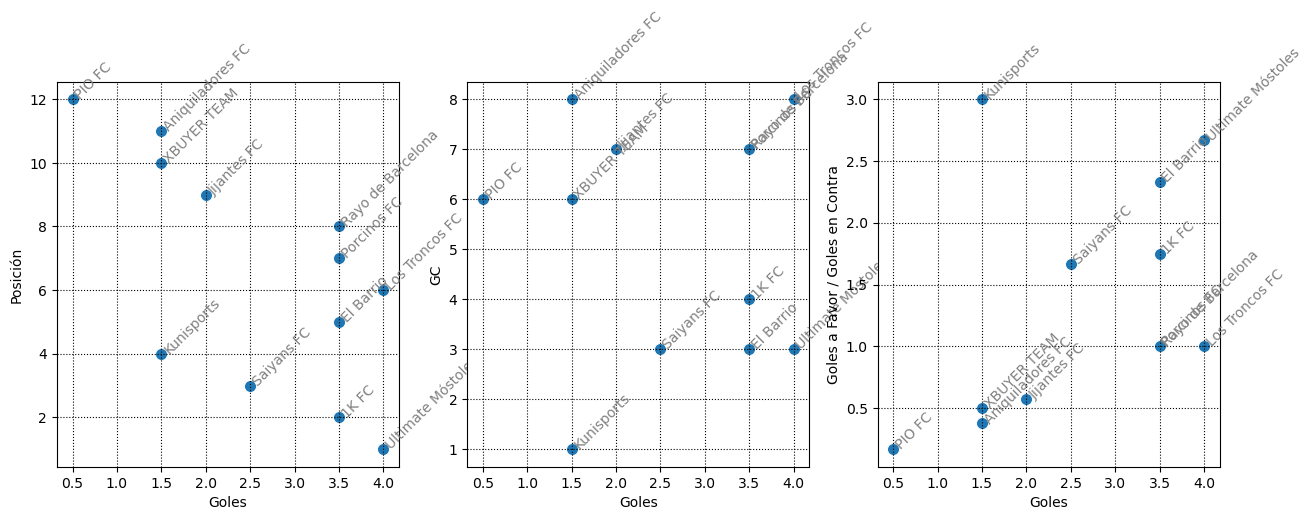

In [61]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

sns.scatterplot(x = 'Goles', y = 'Posición', data = data_results, ax = ax1, s = 75)
sns.scatterplot(x = 'Goles', y = 'GC', data = data_results, ax = ax2, s = 75)
sns.scatterplot(x = 'Goles', y = 'GF.GC', data = data_results, ax = ax3, s = 75)

ax1.set_ylabel(r'Posición')
ax2.set_label(r'Goles en Contra')
ax3.set_ylabel(r'Goles a Favor / Goles en Contra')

for ax, var in zip([ax1, ax2, ax3], ['Posición', 'GC', 'GF.GC']):
    ax.grid(linestyle = ':', color = 'black')
    for i in range(data_results.shape[0]):
        ax.text(x = data_results.Goles[i], 
                y = data_results[var][i], 
                s = data_results.index[i], 
                color = '0.5',
                rotation = 45)

plt.show()

## Assists

In football, an assist refers to a pass or action by a player that leads directly to another player scoring a goal. Assists are often recorded in official statistics and can be an important measure of a player's performance, particularly for midfielders and forwards who are expected to create scoring opportunities for their teammates. Assist records are kept separately from goal records, and a player who earns an assist is credited with one assist, regardless of how many goals are scored as a result of their pass or action.

In [40]:
url = 'https://kingsleague.pro/asistencias/'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:108.0) Gecko/20100101 Firefox/108.0',
          'referer': url}
r = requests.get(url, headers = headers,)
soup = BeautifulSoup(r.text)

In [41]:
data = []
for table in soup.find_all('table'):
    #print(mh3.text)
    
    table_body = table.find('tbody')

    rows = table_body.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [cleandata(ele.text.strip(), S = ["\t", "\n", "V:", "D:", "GF:", "GC:", "TA:", "TR:", "Pos.:", "Ranking:", "Partidos jugados:", "Nombre:", "Asist.:"]) for ele in cols]
        data.append([ele for ele in cols if ele]) # G

In [42]:
pd.DataFrame(data).style

,0,1,2,3,4,5
0,1,Equipo:,Rayo de Barcelona,Franky P.,2,2
1,1,Equipo:,Los Troncos FC,J. Verdú «Gingko»,1,2
2,1,Equipo:,Rayo de Barcelona,Dani P.,2,2
3,1,Equipo:,1K FC,A. Bueno,2,2
4,1,Equipo:,Ultimate Móstoles,Sergio G.,1,2
5,1,Equipo:,Porcinos FC,Kilian,2,1
6,1,Equipo:,Saiyans FC,Gio Ferinu,2,1
7,1,Equipo:,Saiyans FC,Feliu,2,1
8,1,Equipo:,Saiyans FC,David Alba,2,1
9,1,Equipo:,Saiyans FC,R. Carbó,2,1


## JSON

Using the API provided by the [Kings League Project](https://github.com/midudev/kings-league-project) project, we can conveniently and easily obtain other data from the official website.

The web is [https://api.kingsleague.dev](https://api.kingsleague.dev) and from there we can do different requests.

In [64]:
r = requests.get('https://api.kingsleague.dev',)
for i in range(len(r.json())):
    print('-----------')
    print(r.json()[i])
    print(r.json()[i]['endpoint'])
    r1 = requests.get('https://api.kingsleague.dev' + r.json()[i]['endpoint'])
    print(str(r1.json())[:100]) # Only print the first 100 characters
print('-----------')

-----------
{'endpoint': '/leaderboard', 'description': 'Returns the Kings League leaderboard', 'parameters': [{'name': 'team', 'endpoint': '/leaderboard/:teamId', 'description': 'Return the Kings League leaderboard information for a team by his id'}]}
/leaderboard
[{'wins': 2, 'losses': 0, 'scoredGoals': 8, 'concededGoals': 3, 'yellowCards': 1, 'redCards': 0, 'te
-----------
{'endpoint': '/teams', 'description': 'Returns all Kings League teams', 'parameters': [{'name': 'id', 'endpoint': '/teams/:id', 'description': 'Return a Kings League team by his id'}, {'name': 'player-12', 'endpoint': '/teams/:id/players-12', 'description': 'Return the Kings League players 12 for the choosed team'}]}
/teams
[{'id': '1k', 'color': '#6f68f4', 'name': '1K FC', 'image': 'https://kingsleague.dev/teams/logos/1k.
-----------
{'endpoint': '/presidents', 'description': 'Returns all Kings League presidents', 'parameters': [{'name': 'id', 'endpoint': '/presidents/:id', 'description': 'Return a Kings League p

## Streamlit

Streamlit is an open-source Python library that allows developers to create interactive web applications for data science, machine learning, and data visualization. It was created with the goal of making it easy for data scientists and machine learning engineers to create interactive dashboards, visualization tools, and other interactive applications without the need for web development expertise.

Streamlit simplifies the process of creating web applications by providing a high-level API that allows developers to quickly and easily build user interfaces, add interactive elements, and display data visualizations. It automatically takes care of the underlying web technologies, such as HTML, CSS, and JavaScript, so that developers can focus on the data science and machine learning aspects of the application.

The library is built on top of popular Python libraries such as NumPy, Pandas, and Matplotlib and also can work with other libraries like Plotly, Seaborn and etc . It also provides a wide range of built-in widgets, such as sliders, drop-down menus, and buttons, that can be easily incorporated into the application to enable interaction with the data.

Streamlit is also very well suited for creating dashboards and reports, where it can make the process of data visualization more interactive and dynamic, helping the end users in getting insights more quickly and easily. Due to it's simplicity and intuitiveness, it has become a popular choice for creating ML and Data Science applications, and has attracted an active community of developers who contribute to the library.